In [238]:
import numpy as np
# Calculate distance
def calculate_distance(X):
    distance = np.sum(X*X, 1).reshape(1, -1) + np.sum(X*X, 1).reshape(-1, 1) - 2*X.dot(X.T)
    return distance
def get_neighbor(distance, eps):
    neighbors = np.zeros(distance.shape)
    neighbors[distance < eps] = 1
    np.fill_diagonal(neighbors, 0)
    return neighbors
def get_core(neighbors, eps, min_neighbors):
    count = np.sum(neighbors, axis = 1)
    core = np.argwhere(count > min_neighbors + 1)
    core = core.reshape(-1).tolist()
    return core
def get_location(neighbors, min_neighbors):
    count = np.sum(neighbors, axis = 1)
    neighbors = neighbors[count > min_neighbors + 1, :]
    location = []
    for i in range(neighbors.shape[0]):
        location.append(np.argwhere(neighbors[i] == 1).reshape(-1).tolist())
    return location
def label_row(label, row, k, core, location):
    label[row] = k
    if row in core:
        core.remove(row)
        for i in location.get(row):
            label_row(label, i, k, core, location)           
def predict(X, neighbors, core, location):
    label = np.zeros(X.shape[0])
    k = 1
    while len(core) != 0:
        row = core[0]
        label_row(label, row, k, core, location)
        k += 1
    return label

In [239]:
from sklearn import datasets
dataset = datasets.make_circles(n_samples=1000, factor=.5, noise=0.05)[0]

In [240]:
eps = 0.02
min_neighbors = 15
distance = calculate_distance(dataset)
neighbors = get_neighbor(distance, eps)
core = get_core(neighbors,eps,min_neighbors)
location = get_location(neighbors, min_neighbors)
core_location = dict(zip(core, location)) 
label = predict(dataset, neighbors, core, core_location)

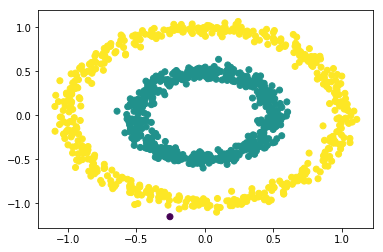

In [245]:
import matplotlib.pyplot as plt
plt.scatter(dataset[:,0],dataset[:,1], c = label)

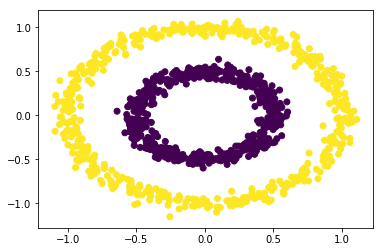

In [246]:
import math
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=math.sqrt(eps), min_samples=min_neighbors).fit(dataset)
plt.scatter(dataset[:,0],dataset[:,1], c = clustering.labels_)